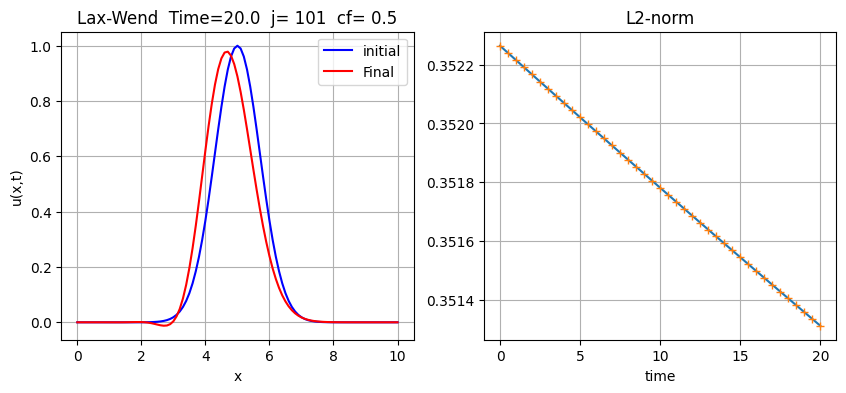

In [5]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
j = 101    # Number of grid points
dx = L/(j-1)   # Grid spacing
x = np.linspace(0, L, j)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

# print('nx=',j)
# print('dx=',dx)
# print('dt=',dt)
# print('Number of iterations=',t_final/dt)

# Define the initial condition
x0 = 5

# Initialize the solution array
u_initial = np.exp(-(x-x0)**2)  
u_current = u_initial.copy()
# We create arrays where we will store the time and the L2 norm
l2norm =[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)
#########################################################################################

import matplotlib.pyplot as plt
import os
##create directory where to save images
# print(os.getcwd())

os.makedirs('./images_Hw_1-1_Lax-Wend') # makedirs create a new directory in the operating system.

# os.listdir('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection')

#######################################################################################################################

# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
# plt.ylim(0,1.1)
plt.savefig('./images_Hw_1-1_Lax-Wend/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

# Solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # Using np.roll is equivalent to using periodic boundary conditions
    SC = (((a*(dt/(dx)))**2)/2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))
    u_next =  u_current - a*(dt/(2*dx))*(np.roll(u_current, -1) - np.roll(u_current, 1)) + SC

    # Update the solution
    u_current  = u_next.copy()

    #advance the time
    t += dt
    i += 1

    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        # plt.ylim(0,1.1)
        plt.savefig('./images_Hw_1-1_Lax-Wend/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

# Plot the final solution
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, u_initial, label='initial', color= 'blue')
plt.plot(x, u_current, label='Final', color= 'red')
plt.title("Lax-Wend  "+'Time='+str(round(t,2))+'  j= {}'.format(j) + '  cf= {}'.format(cf))
# plt.ylim(0,1.1)
plt.ylabel("u(x,t)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
l2_saved=np.genfromtxt('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection/l2norm_LAXWENDROFF.dat', comments='#')
plt.plot(time,l2norm)
plt.title("L2-norm")
plt.xlabel("time")
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.grid()
plt.show()    

Wendroff plot is more aligned than the Lax-Friedrichs plot 

# Most of the changes we make in all schemes do almost the same.
As cf = 0.5, the L2 norm will align perfectly with the saved one

As we go with time, the instability arises more and more

Increasing the cf and j will increase the stability


## The result of all schemes for the L2 norm is increasing as j increases.
## Also, changing the cf will shift slightly in the L2 norm(increase cf, increase theoretical L2 norm).

In [4]:
# set the directory where your images are stored
directory = "./images_Hw_1-1_Lax-Wend/"

# get the list of image files in the directory
files = os.listdir(directory)

#print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

########################################################

import imageio
with imageio.get_writer('./movie_1-1_Lax-Wend.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_Hw_1-1_Lax-Wend/'+file)
        writer.append_data(image)

files=[]
########################################################
# don't worry about the code in this cell, it is just to let you
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_1-1_Lax-Wend.mp4" type="video/mp4">
</video></div>""")